# NLP

## Sentiment analysis

## Identifacação do sentimento (positivo, negativo) em reviews do IMDB

## import padrão

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
df = pd.read_csv('../datasets/IMDB Dataset.csv')

## EDA

In [132]:
df.shape
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [133]:
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## ==> Dataset balanceado

In [134]:
df.dtypes

review       object
sentiment    object
dtype: object

## ==> Ambas features do tipo object

In [135]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

## ==> Não há dados faltando

In [136]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


## ==> Quase todas as reviews são diferentes
## ==> Apenas 2 sentimentos (positivo, negativo)
## ==> Necessário remover pontuação e marcações

## Pre-processamento
- Remoção de marcações HTML
- Remoção de pontuação e caracteres especiais
- Remoção de stopwords
- Stemização / lematização para obter o tronco comum das palavras
- vetorização para codificar dados textuais

In [137]:
# Vamos usar um exemplo
exemplo = df.iloc[1].review
exemplo

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

## pip install bs4

In [138]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(exemplo, 'html.parser')
exemplo = soup.get_text()
exemplo

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [139]:
# Remover tudo excepto Letras usando expressões regulares
import re
exemplo = re.sub('<.*?>', '',exemplo)
exemplo = re.sub(r'\[[^]]*','',exemplo)
exemplo = re.sub(r'\d+','',exemplo)
exemplo = re.sub('[^a-zA-Z]',' ',exemplo)
exemplo

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

In [140]:
# pip install nltk

In [141]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\benso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\benso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [142]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [143]:
exemplo = exemplo.split()
exemplo = [word for word in exemplo if not word in set(stopwords.words('english'))]
exemplo

['A',
 'wonderful',
 'little',
 'production',
 'The',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'BBC',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'The',
 'actors',
 'extremely',
 'well',
 'chosen',
 'Michael',
 'Sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'You',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'Williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'A',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'The',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'It',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'Orton',
 'Halliwell',
 'sets',
 'particularly',
 'flat',
 'Halliwell',
 'murals',
 'decorating',
 

### Stemming / Lematization
### Vamos aplicar e observar as diferenças em cada técnica

In [144]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [145]:
exemplo_stemmer = [stemmer.stem(word) for word in exemplo]
exemplo_stemmer = ' '.join(exemplo_stemmer)
exemplo_stemmer

'a wonder littl product the film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec the actor extrem well chosen michael sheen got polari voic pat you truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec a master product one great master comedi life the realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear it play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [146]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [147]:
exemplo_lemmatizer = [lemmatizer.lemmatize(word) for word in exemplo]
exemplo_lemmatizer = ' '.join(exemplo_lemmatizer)
exemplo_lemmatizer

'A wonderful little production The filming technique unassuming old time BBC fashion give comforting sometimes discomforting sense realism entire piece The actor extremely well chosen Michael Sheen got polari voice pat You truly see seamless editing guided reference Williams diary entry well worth watching terrificly written performed piece A masterful production one great master comedy life The realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears It play knowledge sens particularly scene concerning Orton Halliwell set particularly flat Halliwell mural decorating every surface terribly well done'

In [148]:
# Remoção de conteúdo HTML
def remove_HTML(text):
    soup = BeautifulSoup(text, 'htmlparser')
    return soup.get_text()

# Remoção de pontuações
def remove_ponctuation(text):
    return re.sub(r'\[[^]]*\]', '', text)

# Remoção de outros caracteres que não são letras
def remove_characters(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

# Remover stopwords e lematizar
def remove_stopwords_and_lemmatize(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)

    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_text.append(word)
    text2 = ' '.join(final_text)
    
    return text2

# Função global de limpeza
def cleaning(text):
    text = remove_HTML(text)
    text = remove_ponctuation(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatize(text)
    return text
    

In [149]:
# df['text'] = df['review'].apply(cleaning)

In [150]:
# df.to_csv('..\datasets\imdbProcessado_4.csv')

In [151]:
df = pd.read_csv('../datasets/imdbProcessado_4.csv').drop(['Unnamed: 0'],axis=1)
df

,review,sentiment,text
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...


In [152]:
# pip install WorkCloud,STOPWORDS

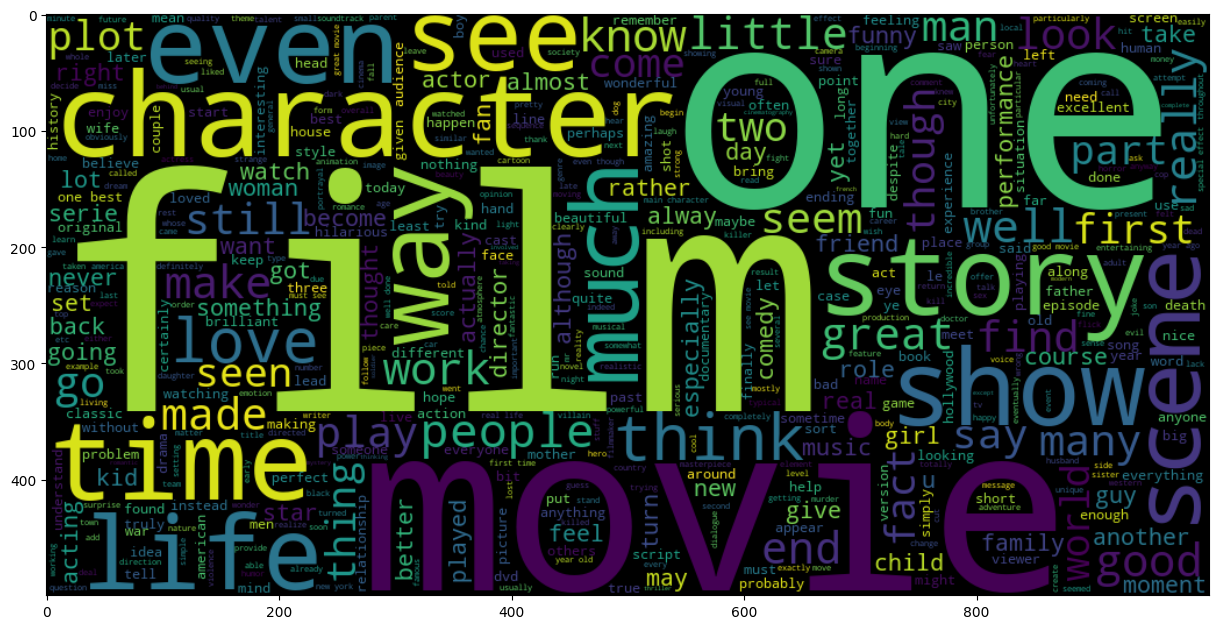

In [153]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15, 15))
wc = WordCloud(max_words=500,width=1000,height=500,stopwords=STOPWORDS).generate(" ".join(df[df.sentiment == 'positive'].text))
plt.imshow(wc, interpolation='bilinear')

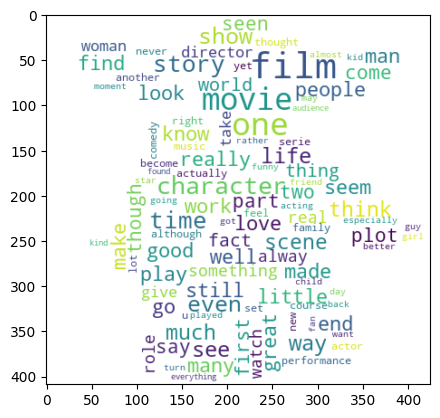

In [154]:
from PIL import Image
from wordcloud import ImageColorGenerator

yoda_coloring = np.array(Image.open(r"../datasets/yoda.jpg"))
stopwords = set(STOPWORDS)

wc = WordCloud(background_color='white',max_words=100,stopwords=stopwords,max_font_size=40,mask=yoda_coloring)

dv = " ".join(df[df.sentiment == 'positive'].text)
wc.generate(dv)
image_colors = ImageColorGenerator(yoda_coloring)
plt.imshow(wc, interpolation='bilinear')

In [155]:
texts =  ' '.join(df['text'])
string = texts.split(" ")

unigram bi e tri

In [156]:
def draw_n_grams(string, i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:20]
    n_gram_df = pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={'index': 'word', 0: 'count'})
    print(n_gram_df.head())
    return

In [157]:
draw_n_grams(string,1)

       word   count
0  (movie,)  103231
1   (film,)   93426
2    (one,)   55428
3   (like,)   41118
4   (time,)   31454


In [158]:
draw_n_grams(string,2)

                word  count
0       (look, like)   2922
1       (ever, seen)   2710
2        (year, old)   2367
3  (special, effect)   2324
4     (even, though)   1999


In [159]:
draw_n_grams(string,3)

                   word  count
0   (movie, ever, seen)    906
1  (worst, movie, ever)    752
2    (film, ever, seen)    447
3   (movie, ever, made)    379
4   (worst, film, ever)    352


# Vectoring

## To vectorize we will aplpy

- Bag od Words model (CountVectorizer)
- TF-IDF model (TfidVectorizer)

In [160]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
exemplo_texto = []
exemplo_texto.append(exemplo_lemmatizer)

exemplo_cv = cv.fit_transform(exemplo_texto).toarray()
exemplo_cv

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
        1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3,
        1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1]], dtype=int64)

In [161]:
cv.get_feature_names_out()

array(['actor', 'bbc', 'chosen', 'come', 'comedy', 'comforting',
       'concerning', 'decorating', 'diary', 'disappears', 'discomforting',
       'done', 'dream', 'editing', 'entire', 'entry', 'every',
       'extremely', 'fantasy', 'fashion', 'filming', 'flat', 'give',
       'got', 'great', 'guard', 'guided', 'halliwell', 'home', 'it',
       'knowledge', 'life', 'little', 'master', 'masterful', 'michael',
       'mural', 'old', 'one', 'orton', 'particularly', 'pat', 'performed',
       'piece', 'play', 'polari', 'production', 'rather', 'realism',
       'really', 'reference', 'remains', 'scene', 'seamless', 'see',
       'sens', 'sense', 'set', 'sheen', 'solid', 'sometimes', 'surface',
       'technique', 'terribly', 'terrificly', 'the', 'thing', 'time',
       'traditional', 'truly', 'unassuming', 'use', 'voice', 'watching',
       'well', 'williams', 'wonderful', 'worth', 'written', 'you'],
      dtype=object)

In [162]:
tfidf = pd.DataFrame(exemplo_cv.transpose(), index = cv.get_feature_names_out())
tfidf.columns = ['Ocorrências']
tfidf

,Ocorrências
actor,1
bbc,1
chosen,1
come,1
comedy,1
...,...
williams,1
wonderful,1
worth,1
written,1


In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
exemplo_tfidf = tfidf.fit_transform(exemplo_texto).toarray()
exemplo_tfidf

array([[0.09245003, 0.09245003, 0.09245003, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.09245003, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.09245003, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.09245003, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.09245003, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.18490007, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.18490007, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.09245003, 0.09245003, 0.09245003,
        0.18490007, 0.09245003, 0.09245003, 0.18490007, 0.09245003,
        0.09245003, 0.18490007, 0.09245003, 0.18490007, 0.09245003,
        0.09245003, 0.09245003, 0.09245003, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.09245003, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.18490007, 0.09245003, 0.09245003,
        0.2773501 , 0.09245003, 0.09245003, 0.09245003, 0.09245003,
        0.09245003, 0.09245003, 0.09245003, 0.09

In [164]:
tfidf.get_feature_names_out()

array(['actor', 'bbc', 'chosen', 'come', 'comedy', 'comforting',
       'concerning', 'decorating', 'diary', 'disappears', 'discomforting',
       'done', 'dream', 'editing', 'entire', 'entry', 'every',
       'extremely', 'fantasy', 'fashion', 'filming', 'flat', 'give',
       'got', 'great', 'guard', 'guided', 'halliwell', 'home', 'it',
       'knowledge', 'life', 'little', 'master', 'masterful', 'michael',
       'mural', 'old', 'one', 'orton', 'particularly', 'pat', 'performed',
       'piece', 'play', 'polari', 'production', 'rather', 'realism',
       'really', 'reference', 'remains', 'scene', 'seamless', 'see',
       'sens', 'sense', 'set', 'sheen', 'solid', 'sometimes', 'surface',
       'technique', 'terribly', 'terrificly', 'the', 'thing', 'time',
       'traditional', 'truly', 'unassuming', 'use', 'voice', 'watching',
       'well', 'williams', 'wonderful', 'worth', 'written', 'you'],
      dtype=object)

In [165]:
tfidf = pd.DataFrame(exemplo_tfidf.transpose(), index = cv.get_feature_names_out())
tfidf.columns = ['TF-IDF']
tfidf

,TF-IDF
actor,0.09245
bbc,0.09245
chosen,0.09245
come,0.09245
comedy,0.09245
...,...
williams,0.09245
wonderful,0.09245
worth,0.09245
written,0.09245


# Vectoring using TF-IDF Technique

## É nesta função

In [166]:
tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (1,2))
df_tfidf = tfidf.fit_transform(df.text).toarray()

In [167]:
df_tfidf_real = pd.DataFrame(df_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf_real

,abandoned,abc,ability,able,absence,absolute,absolutely,absolutely nothing,absurd,abuse,...,young boy,young girl,young man,young people,young woman,younger,youth,zero,zombie,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128908,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.216327,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


# Acabamos o pre-processamento

## A nossa matriz tem valores que podem ser manuseados pelos algoritimos de IA

In [168]:
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV

In [169]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.sentiment = enc.fit_transform(df.sentiment)
enc.classes_

array(['negative', 'positive'], dtype=object)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf_real, df.sentiment, random_state=0)

# SVC

In [171]:
from sklearn.svm import LinearSVC
Linear_svc = LinearSVC(C = 0.5, dual = False, random_state = 42)
Linear_svc = Linear_svc.fit(X_train, y_train)
predict = Linear_svc.predict(X_test)

In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score

<Axes: >

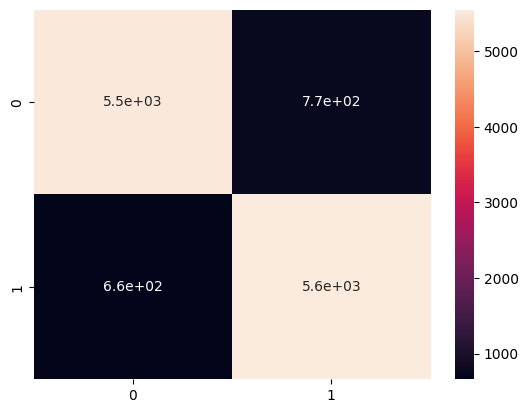

In [173]:
sns.heatmap(confusion_matrix(y_test, predict),  annot=True)

In [174]:
accuracy_score(y_test, predict) * 100

88.6

# Random Forest

In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 2, random_state = 0)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.7856

<Axes: >

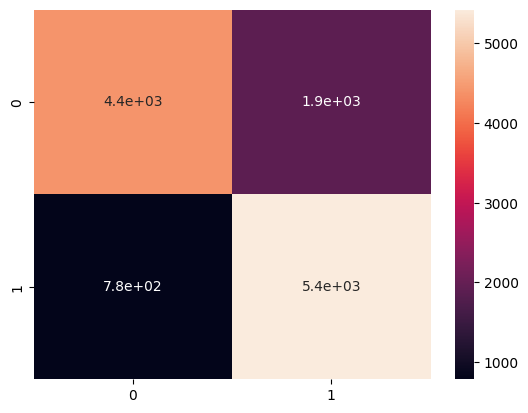

In [176]:
sns.heatmap(confusion_matrix(y_test, rfc_pred),  annot=True)